___

#### Group 2:
#### DJ Dawkins, Rick Fontenot, Joe Lazarus, Puri Rudick
___


# Lab 2: Classification

This Notebook will cover the following topics in order: 

1) Data preparation
* Define and prepare your class variables
* Describe the final dataset that is used for classification/regression

2) Modeling and Evaluation 
* Choose and explain your evaluation metrics
* choose method you will use for dividing your data into train-test-split
* Create three classification models
* Analyze the results
* Discuss advantages
* Which attributes are important

3) Deployment
* How useful is your model

4) Exceptional work


# Prologue

- Imports
- load data
- Data Quality 
- New Features
- Check missing values
- handling missing values
- check for duplicates

In [218]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from datetime import date
import sklearn
pd.set_option("display.max_columns", None, "display.max_rows", None)
import missingno as msno


### Load the raw data

NYC Airbnb data obtained from http://data.insideairbnb.com/united-states/ny/new-york-city/2021-08-04/data/listings.csv.gz

In [219]:
# Load Raw Data
listings=pd.read_csv("https://raw.githubusercontent.com/rickfontenot/airbnb/main/airbnb_nyc_listings.csv?token=ARN5NNHQQO5DGH6T72FBV2DBGD342")

listings.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20210804005827,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/50fc5...,https://a0.muscache.com/im/pictures/user/50fc5...,Midtown,6.0,6.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"New York, United States",Midtown,Manhattan,40.75356,-73.98559,Entire rental unit,Entire home/apt,1,NaN,1 bath,NaN,1.0,"[""Essentials"", ""Extra pillows and blankets"", ""...",$150.00,30,1125,30.0,30.0,1125.0,1125.0,30.0,1125.0,NaN,t,6,36,66,341,2021-08-04,48,0,0,2009-11-21,2019-11-04,4.70,4.72,4.62,4.76,4.79,4.86,4.41,NaN,f,3,3,0,0,0.34
1,3831,https://www.airbnb.com/rooms/3831,20210804005827,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50%,88%,f,https://a0.muscache.com/im/users/4869/profile_...,https://a0.muscache.com/im/users/4869/profile_...,Clinton Hill,1.0,1.0,"['email', 'phone', 'reviews', 'offline_governm...",t,t,"Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,Entire guest suite,Entire home/apt,3,NaN,1 bath,1.0,3.0,"[""Essentials"", ""TV with standard cable"", ""Baby...",$75.00,1,730,1.0,1.0,1125.0,1125.0,1.0,1125.0,NaN,t,0,1,7,212,2021-08-04,408,68,0,2015-01-05,2021-06-29,4.46,4.59,4.50,4.79,4.81,4.72,4.65,NaN,f,1,1,0,0,5.09
2,5121,https://www.airbnb.com/rooms/5121,20210804005827,2021-08-04,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,Garon,2009-02-03,"New York, New York, United States","I am an artist(painter, filmmaker) and curato...",within a day,100%,NaN,f,https://a0.muscache.com/im/pictures/user/72a61...,https://a0.muscache.com/im/pictures/user/72a61...,Bedford-Stuyvesant,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,NaN,Bedford-Stuyvesant,Brooklyn,40.68535,-73.95512,Private room in rental unit,Private room,2,NaN,NaN,1.0,1.0,"[""Long term stays allowed"", ""Air conditioning""...",$60.00,30,730,30.0,30.0,730.0,730.0,30.0,730.0,NaN,t,30,60,90,365,2021-08-04,50

In [220]:
# Examin Data types
listings.dtypes


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
description                                      object
neighborhood_overview                            object
picture_url                                      object
host_id                                           int64
host_url                                         object
host_name                                        object
host_since                                       object
host_location                                    object
host_about                                       object
host_response_time                               object
host_response_rate                               object
host_acceptance_rate                             object
host_is_superhost                               

**Boolean Variables**: 

The data comes with (4) variables with "t", "f". Pandas doesn't recognize this as a Boolean Value. What we need to do is replace them with actual boolean values (True/False) that pandas recognizes while preserving NA to be converted to boolean. 
- **host_is_superhost** (target variable)	
- host_has_profile_pic	
- host_identity_verified	
- has_availability	
- instant_bookable

In [221]:
#Create function to convert t/f to boolean, included if statement so it doesn't error if run multiple times
def tf_to_bool(dataframe, variable,name):
    if str(variable.dtypes)!='boolean':
        dataframe["temp_boolean"]=np.nan
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe.temp_boolean = np.where(
            variable == 't', True, np.where(
            variable ==  'f', False, np.nan))
        dataframe.temp_boolean = dataframe.temp_boolean.astype('boolean')
        dataframe = dataframe.drop(name, axis=1)    
        dataframe.rename({'temp_boolean': name}, axis=1, inplace=True)
        return dataframe
    else:
        return dataframe

listings = tf_to_bool(listings,listings.host_is_superhost,'host_is_superhost')
listings = tf_to_bool(listings,listings.host_has_profile_pic,'host_has_profile_pic')
listings = tf_to_bool(listings,listings.host_identity_verified,'host_identity_verified')
listings = tf_to_bool(listings,listings.has_availability,'has_availability')
listings = tf_to_bool(listings,listings.instant_bookable,'instant_bookable')

### Regular Expressions
**Price** : our other target variable, is currently an object data type. We need to convert this to a floating point integer. This requires the use of a regular expression to remove "$" and "," from string and convert to float.

In [222]:
print(listings.price.dtypes) #initial type is object
print(listings.price.loc[[299]]) #original value "$2,500.00"
listings.price = listings.price.replace('[\$,]', '', regex=True).astype(float)
print(listings.price.dtypes) #transformed type is float64
print(listings.price.loc[[299]]) #new value is 2500.0

object
299    $2,500.00
Name: price, dtype: object
float64
299    2500.0
Name: price, dtype: float64


**Percentage signs**
Columns with percentages need "%" removed to convert to numeric:
- host_response_rate
- host_acceptance_rate

In [223]:
print(listings.host_response_rate.dtypes) #initial type is object
print(listings.host_response_rate.loc[[299]]) #original value "100%"
listings.host_response_rate = listings.host_response_rate.replace('%', '', regex=True).astype(float)
listings.host_acceptance_rate = listings.host_acceptance_rate.replace('%', '', regex=True).astype(float)
print(listings.host_response_rate.dtypes) #transformed type is float64
print(listings.host_response_rate.loc[[299]]) #new value is 100.0

object
299    100%
Name: host_response_rate, dtype: object
float64
299    100.0
Name: host_response_rate, dtype: float64


**Date Variables**  need to be converted based on string format before updating the data type. All the date columns are using the same military date format which is a numerical representation of year-month-day seperated by a hyphon. EG 2012-01-01 is January first, two thousand twelve. The same strategy can be applied to each of the following date columns: 
- last_scraped
- host_since
- calendar_last_scraped
- first_review
- last_review

In [224]:
date_vars = ['last_scraped','host_since','calendar_last_scraped','first_review','last_review']
listings[date_vars] =  listings[date_vars].apply(pd.to_datetime, format='%Y-%m-%d', errors ='coerce')


**Text Parsing**  bathrooms_text in its current form is not atomized. Meaning it contains more than more piece of information. It contains the Numeric quantity bathrooms and string values describing if it is shared or private. Create dictionary to parse strings and create two new variables of correct type.<br>
<br />

This work goes beyond the scope of data type and into **Data Quality** and **New Features** If we decide to present this for credit, we will present this work again in those sections.<br>
<br/>
Two new columns are being created from *bathroom_text*: **num_baths** and **bath_type**
- **num_baths** will be a floating point value
- **bath_type** will be a categorical value.

In [225]:
#convert nAn values to 'NA' for parsing, will change back to nAn after splitting
listings['bathrooms_text'] = listings['bathrooms_text'].astype(object).replace(np.nan, 'NA')

#Create translation dictionary since description formats are not consistent
transdict = {'1 bath': '1 private', 
             'NA': 'NA',
             '1.5 baths': '1.5 private',
             '1 shared bath': '1 shared', 
             '1 private bath': '1 private',
             'Shared half-bath': '0.5 shared',
             '2 baths': '2 private',
             '1.5 shared baths': '1.5 shared',
             '3 baths': '3 private',
             'Half-bath': '0.5 private',
             '2.5 baths': '2.5 private', 
             '2 shared baths': '2 shared',
             '0 baths' : '0 private',
             '4 baths':'4 private', 
             '0 shared baths': '0 shared',
             'Private half-bath': '0.5 private',  
             '4.5 baths' :'4.5 private', 
             '5.5 baths': '5.5 private' , 
             '2.5 shared baths': '2.5 shared',
             '3.5 baths': '3.5 private', 
             '15.5 baths': '15.5 private', 
             '5 baths': '5 private', 
             '3 shared baths': '3 shared', 
             '4 shared baths': '4 shared',
             '6 baths': '6 private', 
             '3.5 shared baths': '3.5 private', 
             '6 shared baths' : '6 shared',
             '6.5 shared baths': '6.5 shared', 
             '4.5 shared baths' :'4.5 private',
             '5.5 shared baths' : '5.5 private', 
             '7.5 baths': '7.5 private', 
             '5 shared baths': '5 shared',
             '6.5 baths': '6.5 private', 
             '8 baths': '8 private', 
             '7 shared baths':'7 shared', 
             '7 baths': '7 private', 
             '10 baths': '10 private'}

#use trandict to iterate over bathrooms_text column
listings['bathrooms_text'] = [transdict[letter] for letter in listings['bathrooms_text']]

#use str.split to create two new columns 'num_baths' and 'bath_type'
listings[['num_baths','bath_type']] = listings['bathrooms_text'].str.split(' ', 1, expand = True)

#For num_baths convert 'NA' values back to nan and convert type to float
listings['num_baths'] = listings['num_baths'].astype(object).replace( 'NA',np.nan)
listings['num_baths'] = listings['num_baths'].astype(np.float16)

#For bath type convert 'NA' values back to nan and convert type to category
listings.bath_type.fillna(value=np.nan, inplace=True)
listings['bath_type'] = listings['bath_type'].astype('category')
 


### Dropping bathroom_text 
num_baths and bath_type now represent the data that was contained in bathroom_text

In [226]:
#Confirm conversions for bathroom text
print(listings.num_baths.dtypes) #transformed type is float16
print(listings.num_baths.unique())
print(listings.bath_type.dtypes) #transformed type is category
print(listings.bath_type.unique()) 

#Drop original bathrooms_text column now that replaced by two new variables
listings.drop('bathrooms_text', axis=1, inplace=True)

float16
[ 1.   nan  1.5  0.5  2.   3.   2.5  0.   4.   4.5  5.5  3.5 15.5  5.
  6.   6.5  7.5  8.   7.  10. ]
category
['private', NaN, 'shared']
Categories (2, object): ['private', 'shared']


### Check Work
Check current data types for all variables before converting to desired types

In [227]:
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                      object
host_response_rate                                     

### Data Type Dictionary
In this step we are coercing the pandas to recognize the columns in the data type that best represents each particular type of observation.<br>
<br />
To do so Data Type dictionary is created and convert all variables to proper format and bit sizes based on the key value pair.

In [228]:
convert_dict = {'id': 'Int16',
'scrape_id': 'Int64',
'last_scraped': 'datetime64[ns]',
'host_id': 'Int16',
'host_name': str,
'host_since': 'datetime64[ns]',
'calendar_last_scraped': 'datetime64[ns]',
'host_response_time': 'category',
'host_response_rate': 'float64',
'host_acceptance_rate': 'float64',
'host_is_superhost': bool,
'host_neighbourhood': 'category',
'host_listings_count': 'Int16',
'host_total_listings_count': 'Int16',
'host_verifications': str,
'host_has_profile_pic': bool,
'host_identity_verified': bool,
'neighbourhood': str,
'neighbourhood_cleansed': 'category',
'neighbourhood_group_cleansed': 'category',
'property_type': 'category',
'room_type': 'category',
'accommodates': 'Int16',
'bedrooms': 'Int16',
'beds': 'Int16',
'amenities': str,
'price': 'float64',
'minimum_nights': 'Int16',
'maximum_nights': 'Int16',
'minimum_minimum_nights': 'Int16',
'maximum_minimum_nights': 'Int16',
'minimum_maximum_nights': 'Int16',
'maximum_maximum_nights': 'Int16',
'minimum_nights_avg_ntm': 'Int16',
'maximum_nights_avg_ntm': 'Int16',
'has_availability': bool,
'availability_30': 'Int16',
'availability_60': 'Int16',
'availability_90': 'Int16',
'availability_365': 'Int16',
'number_of_reviews': 'Int16',
'number_of_reviews_ltm': 'Int16',
'number_of_reviews_l30d': 'Int16',
'first_review': 'datetime64[ns]',
'last_review': 'datetime64[ns]',
'review_scores_rating': 'float64',
'review_scores_accuracy': 'float64',
'review_scores_cleanliness': 'float64',
'review_scores_checkin': 'float64',
'review_scores_communication': 'float64',
'review_scores_location': 'float64',
'review_scores_value': 'float64',
'instant_bookable': bool,
'calculated_host_listings_count': 'Int16',
'calculated_host_listings_count_entire_homes': 'Int16',
'calculated_host_listings_count_private_rooms': 'Int16',
'calculated_host_listings_count_shared_rooms': 'Int16',
'reviews_per_month': 'float64',
'num_baths': 'float64',
'bath_type': 'category'
               }
  
listings = listings.astype(convert_dict, errors='ignore')
print(listings.dtypes)

id                                                       int64
listing_url                                             object
scrape_id                                                Int64
last_scraped                                    datetime64[ns]
name                                                    object
description                                             object
neighborhood_overview                                   object
picture_url                                             object
host_id                                                  int64
host_url                                                object
host_name                                               object
host_since                                      datetime64[ns]
host_location                                           object
host_about                                              object
host_response_time                                    category
host_response_rate                                     

### Removing columns we cannot interpret 
There's a lot of information for each listing. We only want to keep the most relevant data. The data set did not come with a definition of terms. Some columns we are not able to work out what they represent. Thus we will remove these columns and not present them in the Data Meaning and Type. 


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

In [229]:
listings.drop(['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights',
               'maximum_maximum_nights' ,'minimum_nights_avg_ntm','maximum_nights_avg_ntm',
               'calculated_host_listings_count_shared_rooms', 'calculated_host_listings_count_entire_homes',
               'calculated_host_listings_count_private_rooms'], axis=1, inplace = True)

### Removing columns we don't intend to work with
There's a lot of information for each listing. We only want to keep the most relevant data. There are columns we do not intend to use in our analysis 
- listing_url
- scrape_id
- name
- picture_url
- host_url
- host_thumbnail_url
- host_picture_url

In [230]:
listings.drop(['listing_url','scrape_id','picture_url','host_url','host_thumbnail_url',
               'host_total_listings_count','host_picture_url','calendar_last_scraped'], axis=1, inplace = True)

### Check missing values
This check is done to ensure we've preserved the data integrity and its missing values.

In [231]:
listings.isna().sum()

id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                         0
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


### Function to convert null values in neighbourhood to np.nan data type
Although the neighbourhood variable showed 0 NA in the isna() summary tables we noticed through viewing the data that many were missing. After iterating through 10 tests against the strange na type upon import, we wrote a custom function to replace them with proper np.nan so that it would show up in the missing value reports and could be imputed.


In [232]:
# Missing values for neighbourhood not recognized by .isna, replace them with np.nan for further analysis.
def f(row):
    if str(row['neighbourhood']) == 'nan':
        val = np.nan
    else:
        val = row['neighbourhood']
    return val

listings['neighbourhood'] = listings.apply(f, axis=1)

# Then run .isna summary again
listings.isna().sum()


id                                    0
last_scraped                          0
name                                 13
description                        1236
neighborhood_overview             14133
host_id                               0
host_name                             0
host_since                           23
host_location                       119
host_about                        15032
host_response_time                15676
host_response_rate                15676
host_acceptance_rate              15186
host_neighbourhood                 6871
host_listings_count                  23
host_verifications                    0
neighbourhood                     14132
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                         36724


## Preserving variables with missing values

For variables with  less than 1,000 missing values (less than 2.7% of observations), we chose not to impute. It may be the case that the lack of data is data in and of itself. Guests may be influenced by the lack of data when choosing a listing. During our analyses we will consider this. In certain cases we may filter. <br><br /> Those variables are:
* name
* host_since
* host_location
* host_thumbnail_url
* host_picture_url
* host_listings_count
* host_total_listings_count
* host_is_superhost
* host_has_profile_pic
* host_identity_verified
* has_availability
* instant_bookable
* num_baths (new variable)
* bath_type (new variable)

### Drop columns with 100% missing values (i.e. blank variables)

Easy decision to remove columns with no information. Getting rid of here so we don't have to discuss this in our data meaning and type write up. Didn't think you'd mind this step taking place here. 

In [233]:
listings.drop(['bathrooms','calendar_updated','license'], axis=1, inplace = True)

### Handling missing values in "Object" (string) data type 
Airbnb allows hosts to give detailed written descriptions. In some observations these text fields are blank. As mentioned before lack of data can be data in and of itself. Thus we don't want to disgard these observations. So we made a decision to give descriptions that are blank a string of "Missing".
For missing values in object and category data type variables, we didn't find correlations to other missing values or correlations to other missing values to impute. In ordered to perserve the rows we replaced missing values with "missing".

In [234]:
# Replace missing values in object data type variables.

listings.description.fillna("missing", inplace=True)
listings.neighborhood_overview.fillna("missing", inplace=True)
listings.host_about.fillna("missing", inplace=True)

### Handling missing values in "Category" data type

Similar to the text fields information can be missing. But we'd like to presrve the row. Thus for missing values in a category data type we used the following function. 

In [235]:
# Replace missing values in category data type variables.

# Function to impute null value with new category
def impute_nan_create_category(listings,ColName):
     listings[ColName] = np.where(listings[ColName].isnull(),"missing",listings[ColName])

## Call function to create new category for variables
for Columns in ['host_response_time', 'host_neighbourhood', 'neighbourhood']:
    impute_nan_create_category(listings,Columns)

### Handing missing values in "Numerical" data type
For missing value in numerical data type variables, since we could not find any correlations between the particular variables with others, we replaced all of the missing value with its mean, except for bedrooms that we replaced with it median because we want to keep its data type as integer.  For reviews_per_month, we know it is calculated from number_of_reviews/(last_scraped - first_review), so we looked at those 3 variables values, and replace the missing values with the result from the calculation.

In [236]:
# Replace missing values in numerical variables with its mean.
listings.host_response_rate.fillna(listings.host_response_rate.mean(), inplace=True)
listings.host_acceptance_rate.fillna(listings.host_acceptance_rate.mean(), inplace=True)
listings.review_scores_rating.fillna(listings.review_scores_rating.mean(), inplace=True)
listings.review_scores_accuracy.fillna(listings.review_scores_accuracy.mean(), inplace=True)
listings.review_scores_checkin.fillna(listings.review_scores_checkin.mean(), inplace=True)
listings.review_scores_cleanliness.fillna(listings.review_scores_cleanliness.mean(), inplace=True)
listings.review_scores_communication.fillna(listings.review_scores_communication.mean(), inplace=True)
listings.review_scores_location.fillna(listings.review_scores_location.mean(), inplace=True)
listings.review_scores_value.fillna(listings.review_scores_value.mean(), inplace=True)

# Replace missing values in numerical variables with its median.
listings.bedrooms.fillna(listings.bedrooms.median(), inplace=True)

### Handling missing values in Ratios
The ratio calculated by review per month will produce and error when a listing does not have a reivew yet. 


In [237]:
# Replace missing value in reviews_per_month based on value in last_scraped, first_review, and number_of_reviews.

# Check for the three columns mentioned value for null reviews_per_month
review_pMonth_vs_numReview = listings[listings['reviews_per_month'].isnull()]
review_pMonth_vs_numReview = review_pMonth_vs_numReview[['last_scraped', 'first_review', 'number_of_reviews', 'reviews_per_month']]

# All missing values in reviews_per_month has 0 number_of_reviews
review_pMonth_vs_numReview.number_of_reviews.unique()

# Replace missing value in reviews_per_month with zero
listings.reviews_per_month = listings.reviews_per_month.fillna(0)

### Datetime variable missing values
For datetime data type variables, we decided to replace missing values with current date. This is a placeholder for potential future reviews. One of the new features we'll create is reviews_duration (last_review - first_review) and this method of imputation will result in 0 for reviews_duration on these missing values

In [238]:
listings.first_review = listings.first_review.fillna(date.today())
listings.last_review = listings.last_review.fillna(date.today())

In [239]:
listings.isna().sum()


id                                  0
last_scraped                        0
name                               13
description                         0
neighborhood_overview               0
host_id                             0
host_name                           0
host_since                         23
host_location                     119
host_about                          0
host_response_time                  0
host_response_rate                  0
host_acceptance_rate                0
host_neighbourhood                  0
host_listings_count                23
host_verifications                  0
neighbourhood                       0
neighbourhood_cleansed              0
neighbourhood_group_cleansed        0
latitude                            0
longitude                           0
property_type                       0
room_type                           0
accommodates                        0
bedrooms                            0
beds                              594
amenities   

## Check for Duplicate Data

In [240]:
# Check for duplicate rows
print('Duplicate rows: ',listings.duplicated(subset=listings.columns.difference(['id'])
, keep='first').sum())


Duplicate rows:  0


This function checks for duplicate records within the data frame. None were found. We removed the ID column to prevent the primary key from deceiving the function. In the sections above we already removed columns that were near duplicates. Such as;


- minimum_minimum_nights                             
- maximum_minimum_nights                             
- minimum_maximum_nights                             
- maximum_maximum_nights                             
- minimum_nights_avg_ntm                             
- maximum_nights_avg_ntm   
- calculated_host_listings_count_entire_homes
- calculated_host_listings_count_private_rooms
- calculated_host_listings_count_shared_rooms

## New Feature: Reviews Duration

Create this from the time difference of last review minus first review. This may be a more accurate representation of how long someone has been an active host than the original host_since variable provided in the dataset which appears to be based on sign up date, not activity.

In [241]:
listings['reviews_duration'] = listings.last_review - listings.first_review
# Format is timedelta, extract the numer of days like this:
listings.reviews_duration = listings.reviews_duration.astype('timedelta64[D]')

## New Feature: Price per bed

In [242]:
listings['price_per_bed'] = listings.price / listings.beds
listings.price_per_bed.replace([np.inf, -np.inf], np.nan, inplace=True)

## New Feature: Price per accomodation

In [243]:
listings['price_per_accomodation'] = listings.price / listings.accommodates
listings.price_per_accomodation.replace([np.inf, -np.inf], np.nan, inplace=True)

## New Features: room_privacy & domicile_type

**property_type** has two bits of information nested in it. It lets the guest know the privacy status of a listings and domicile type e.g., house, condo, villa, hotel etc. To atomize this information we will use the same strategy as bathroom text to parce out the information. 

In [244]:
#create dictionary of terms
prop_type_transdict = {'Entire rental unit' : 'entire rental-unit',
'Entire guest suite' : 'entire guest-suite', 
'Private room in rental unit' : 'private-room rental-unit',
'Private room in townhouse' : 'private-room townhouse',
'Private room in condominium (condo)': 'private-room condo', 
'Private room in loft': 'private-room loft', 
'Entire loft': 'entire loft',
'Private room in residential home': 'private-room home',
'Entire condominium (condo)': 'entire condo',
'Entire residential home': 'entire home',
'Entire townhouse': 'entire townhouse',
'Private room in bed and breakfast': 'private-room bnb',
'Entire guesthouse': 'entire guesthouse', 
'Private room in guest suite': 'private-room guest-suite',
'Bus': 'entire Bus',
'Room in boutique hotel': 'private-room boutique-hotel',
'Shared room in loft': 'shared-room loft',
'Shared room in rental unit':'shared-room rental-unit', 
'Shared room in residential home': 'shared-room home', 
'Private room': 'private-room room', 
'Private room in hostel':'private-room hostel',
'Entire place': 'entire place',
'Private room in guesthouse': 'private-room guesthouse',
'Boat': 'entire boat',
'Entire serviced apartment': 'entire serviced-apartment',
'Room in aparthotel': 'private-room aparthotel',
'Shared room in earth house': 'shared-room earth-house',
'Floor': 'entire floor',
'Shared room in hostel': 'shared-room hostel', 
'Room in serviced apartment': 'private-room serviced-apartment',
'Entire cottage': 'entire cottage',
'Shared room in condominium (condo)': 'shared-room condo',
'Private room in serviced apartment': 'private-room serviced-apartment',
'Room in hotel': 'private-room hotel',
'Private room in boat': 'private-room boat',
'Cave': 'entire cave', 
'Tiny house': 'entire tiny-house',
'Private room in floor': 'private-room floor',
'Entire bungalow': 'entire bungalow',
'Shared room in townhouse': 'shared-room townhouse',
'Houseboat': 'entire houseboat',
'Private room in bungalow': 'private-room bungalow',
'Entire villa': 'entire villa',
'Private room in resort': 'private-room resort',
'Shared room in guest suite': 'shared-room guest-suite',
'Private room in castle': 'private-room castle',
'Private room in villa': 'private-room villa',
'Shared room in floor':'shared-room floor',
'Shared room in serviced apartment':'shared-room serviced-apartment',
'Entire bed and breakfast': 'entire bnb',
'Entire home/apt': 'entire home',
'Private room in tiny house':'private-room tiny-house', 
'Private room in tent':'private-room tent',
'Private room in in-law': 'private-room in-law',
'Private room in barn': 'private-room barn',
'Camper/RV': 'entire rv',
'Room in resort':'private-room resort',
'Shared room in bed and breakfast': 'shared-room bnb',
'Private room in farm stay': 'private-room farm',
'Private room in casa particular': 'private-room home',
'Private room in dorm': 'private-room dorm',
'Room in bed and breakfast':'private-room bnb',
'Private room in camper/rv': 'private-room rv',
'Shared room in island': 'shared-room island',
'Shared room in bungalow': 'shared-room bungalow',
'Private room in earth house': 'private-room earth-house',
'Private room in cottage': 'private-room cottage',
'Lighthouse': 'entire lighthouse', 
'Private room in train': 'private-room train',
'Barn': 'entire barn',
'Private room in lighthouse': 'private-room lighthouse',
'Castle': 'entire castle',
'Tent': 'entire tent',
'Tower': 'entire tower',
'Casa particular': 'entire home'}

#use prop_type_trandict to iterate over bathrooms_text column
listings['property_type'] = [prop_type_transdict[letter] for letter in listings['property_type']]

#use str.split to create two new columns 'room_privacy' and 'domicile_type'
listings[['room_privacy','domicile_type']] = listings['property_type'].str.split(expand=True)

#convert new columns to category data type
listings['room_privacy'] = listings['room_privacy'].astype('category')
listings['domicile_type'] = listings['domicile_type'].astype('category')

### Results of property_type atomization

(3) levels of privacy extracted. 
1. Entire
    denoting guests will have the domicile to themselves.
2. private-room 
    guests will have a room to themselves but shared access to common areas with other guests or hosts
3. shared-room
    guests will possibly share a room with other guests or hosts and shared access to common areas. <br><br />

(38) different categories of domicile 
- casa particular I reduced to home (spanish for private residence)
- private room in law i left as room in law. Refers to in law suite. This is your own space on a property but is on the same property as another domicile.
- bed and breakfast is bnb
- Floor i left as floor. I could grasp the meaning of that either
- Villa remains villa since I think that describes a particular domicile that differs from home
- rental unit could be merged into apartment but it could also mean a home so i left as is. 
- serviced-apartment is probably something unique and deserves its own class outside of apartment
- townhouse remains townhouse since I think that describes a particualr domicile that differs from home. 
- aparthotel remains due to lack of understanding 

<AxesSubplot:xlabel='count', ylabel='domicile_type'>

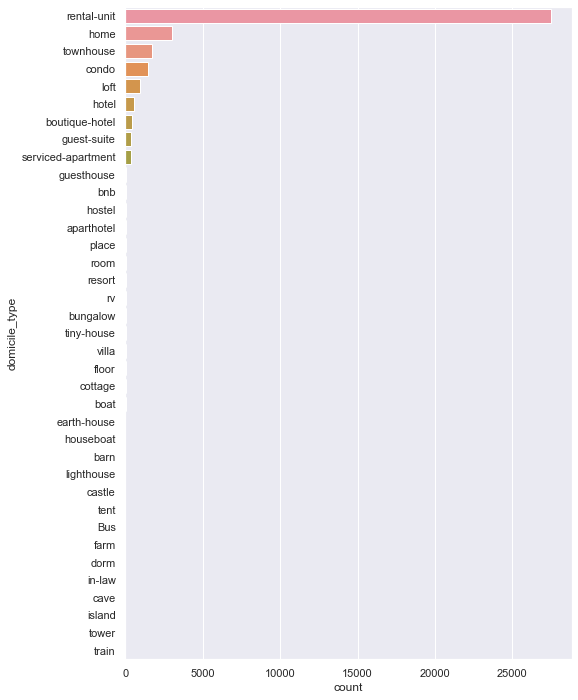

In [245]:
plt.figure(figsize = (8,12))
sns.countplot(y="domicile_type", data=listings, order = listings['domicile_type'].value_counts().index, orient='h')


### Key Observations:

Top Five domiciles types:
- Rental-Unit
- Home
- Townhouse
- Condo
- Loft

It appears many people are listing units that they might not own but, have certain rights to list on Airbnb. This makes sense for NYC many people rent apartments, instead of owning homes. To make money on the side they might stay with family or friends and list the unit.

___
# Data Preparation
___
#### [15 points total] 

> 
> ##  Define and Prepare Your Class Variables 
> 
Use proper variable representations (int, float, one-hot, etc.). Use pre-processing methods (as needed) for dimensionality reduction, scaling, etc. Remove variables that are not needed/useful for the analysis.

> #### [10 points]

In [246]:
#Check remaining missing values and drop records
listings.isna().sum()

id                                   0
last_scraped                         0
name                                13
description                          0
neighborhood_overview                0
host_id                              0
host_name                            0
host_since                          23
host_location                      119
host_about                           0
host_response_time                   0
host_response_rate                   0
host_acceptance_rate                 0
host_neighbourhood                   0
host_listings_count                 23
host_verifications                   0
neighbourhood                        0
neighbourhood_cleansed               0
neighbourhood_group_cleansed         0
latitude                             0
longitude                            0
property_type                        0
room_type                            0
accommodates                         0
bedrooms                             0
beds                     

Relatively small amount of missing values remaining after imputing in sections above. After dropping records with missing values we have 34460 records and 58 features with superhost as the target

In [247]:
listings = listings.dropna()
listings.shape


(34460, 60)

Examining Remaining columns, we will keep 'id' as an identifier and remove the following columns that are identifiers, repeate info contained in other columns, or not applicable to classification models due to too many unique values:

last_scraped
name
description
neighborhood_overview
host_id
host_name
host_since
host_location
host_about
host_verifications
neighbourhood
room_type
amenities
number_of_reviews_ltm
number_of_reviews_l30d
first_review
last_review
calculated_host_listings_count

In [248]:
listings.head()

,id,last_scraped,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_verifications,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month,host_is_superhost,host_has_profile_pic,host_identity_verified,has_availability,instant_bookable,num_baths,bath_type,reviews_duration,price_per_bed,price_per_accomodation,room_privacy,domicile_type
0,2595,2021-08-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,2845,Jennifer,2008-09-09,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,missing,86.330958,75.619603,Midtown,6,"['email', 'phone', 'reviews', 'offline_governm...","New York, United States",Midtown,Manhattan,40.75356,-73.98559,entire rental-unit,Entire home/apt,1,1,1,"[""Essentials"", ""Extra pillows and blankets"", ""...",150.0,30,1125,6,36,66,341,48,0,0,2009-11-21 00:00:00,2019-11-04 00:00:00,4.70,4.72,4.62,4.76,4.79,4.86,4.41,3,0.34,False,True,True,True,False,1.0,private,3635.0,150.0,150.0,entire,rental-unit
1,3831,2021-08-04,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,4869,LisaRoxanne,2008-12-07,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,within a day,50.000000,88.000000,Clinton Hill,1,"['email', 'phone', 'reviews', 'offline_governm...","Brooklyn, New York, United States",Bedford-Stuyvesant,Brooklyn,40.68494,-73.95765,entire guest-suite,Entire home/apt,3,1,3,"[""Essentials"", ""TV with standard cable"", ""Baby...",75.0,1,730,0,1,7,212,408,68,0,2015-01-05 00:00:00,2021-06-29 00:00:00,4.46,4.59,4.50,4.79,4.81,4.72,4.65,1,5.09,False,True,True,True,False,1.0,private,2367.0,25.0,25.0,entire,guest-suite
3,5136,2021-08-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,missing,7378,Rebecca,2009-02-03,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",within a day,88.000000,33.000000,Greenwood Heights,1,"['email', 'phone', 'reviews']",missing,Sunset Park,Brooklyn,40.66265,-73.99454,entire rental-unit,Entire home/apt,4,2,2,"[""TV with standard cable"", ""Long term stays al...",275.0,5,1125,7,9,9,184,1,0,0,2014-01-02 00:00:00,2014-01-02 00:00:00,5.00,5.00,5.00,5.00,5.00,4.00,5.00,1,0.01,False,True,True,True,False,1.5,private,0.0,137.5,68.75,entire,rental-unit
4,5178,2021-08-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",8967,Shunichi,2009-03-03,"New York, New York, United States",I used to work for a financial industry but no...,within an hour,100.000000,100.000000,Hell's Kitchen,1,"['email', 'phone', 'facebook', 'reviews']","New York, United States",Midtown,Manhattan,40.76457,-73.98317,private-room rental-unit,Private room,2,1,1,"[""Essentials"", ""Free street parking"", ""TV"", ""W...",61.0,2,14,3,7,14,255,485,12,4,2010-08-18 00:00:00,2021-07-18 00:00:00,4.20,4.19,3.71,4.65,4.40,4.86,4.35,1,3.63,False,True,False,True,False,1.0,private,3987.0,61.0,30.5,private-room,rental-unit
5,5203,2021-08-04,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,7490,MaryEllen,2009-02-05,"New York, New York, United States

### Make Host Centric Data from listings data 

In MiniLab we found aggregating the data by host_id produced better results. 

In [249]:
temp = listings

rating_avg = temp.groupby('host_id')['review_scores_rating'].mean()
rating_avg= rating_avg.to_frame().rename(columns={'review_scores_rating':'rating_avg'}).reset_index()

rating_max = temp.groupby('host_id')['review_scores_rating'].max()
rating_max= rating_max.to_frame().rename(columns={'review_scores_rating':'rating_max'}).reset_index()

reviews_total = temp.groupby('host_id')['number_of_reviews'].sum()
reviews_total= reviews_total.to_frame().rename(columns={'number_of_reviews':'reviews_total'}).reset_index()

host_response_time_max = temp.groupby('host_id')['host_response_time'].max()
host_response_time_max= host_response_time_max.to_frame().rename(columns={'host_response_time':'response_time_max'}).reset_index()

host_response_rate_median = temp.groupby('host_id')['host_response_rate'].median()
host_response_rate_median= host_response_rate_median.to_frame().rename(columns={'host_response_rate':'response_rate_median'}).reset_index()

acceptance_rate_median = temp.groupby('host_id')['host_acceptance_rate'].median()
acceptance_rate_median= acceptance_rate_median.to_frame().rename(columns={'host_acceptance_rate':'acceptance_rate_median'}).reset_index()

total_nyc_listings = temp.groupby('host_id')['calculated_host_listings_count'].median()
total_nyc_listings= total_nyc_listings.to_frame().rename(columns={'calculated_host_listings_count':'total_nyc_listings'}).reset_index()

accommodates_median = temp.groupby('host_id')['accommodates'].median()
accommodates_median= accommodates_median.to_frame().rename(columns={'accommodates':'accommodates_median'}).reset_index()

price_median = temp.groupby('host_id')['price'].median()
price_median= price_median.to_frame().rename(columns={'price':'price_median'}).reset_index()

availability_60_median = temp.groupby('host_id')['availability_60'].median()
availability_60_median= availability_60_median.to_frame().rename(columns={'availability_60':'availability_60_median'}).reset_index()

reviews_duration_median = temp.groupby('host_id')['reviews_duration'].median()
reviews_duration_median= reviews_duration_median.to_frame().rename(columns={'reviews_duration':'reviews_duration_median'}).reset_index()

superhost_max = temp.groupby('host_id')['host_is_superhost'].max()
superhost_max= superhost_max.to_frame().rename(columns={'host_is_superhost':'superhost_max'}).reset_index()

data_frames = [rating_avg, rating_max, reviews_total, host_response_time_max, host_response_rate_median, acceptance_rate_median, 
total_nyc_listings, accommodates_median, price_median, availability_60_median, reviews_duration_median, superhost_max]

from functools import reduce
host_df = reduce(lambda  left,right: pd.merge(left,right,on=['host_id'], how='outer'), data_frames)

host_df.head(10)

,host_id,rating_avg,rating_max,reviews_total,response_time_max,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max
0,2420,4.574993,4.574993,0,within an hour,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True
1,2438,0.000000,0.000000,1,missing,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False
2,2571,4.910000,4.910000,34,within an hour,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True
3,2782,4.574993,4.574993,0,within a day,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False
4,2787,4.732499,4.880000,136,within an hour,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False
5,2845,4.850000,5.000000,50,missing,86.330958,75.619603,3.0,1.0,150.0,37.5,2128.5,False
6,2868,4.000000,4.000000,2,within a day,67.000000,0.000000,1.0,2.0,60.0,26.0,-225.0,False
7,2881,4.830000,4.880000,578,within an hour,100.000000,98.000000,2.0,2.0,50.0,6.5,1910.0,True
8,3757,4.574993,4.574993,0,within a day,50.000000,33.000000,1.0,2.0,350.0,3.0,0.0,False
9,4396,4.555000,4.650000,138,within a day,96.000000,59.000000,2.0,1.5,99.0,13.0,1266.5,False


### Dummy Variables for Host level data
Prepare host level data set for modeling with dummy variables for categoricals

In [250]:
#Categoricals_to_convert = ['response_time_max']

# using pd get dummies for the category columns we are keeping
#dummies = pd.get_dummies(host_df[Categoricals_to_convert],drop_first=True)

#dropping original columns
#temp = host_df.drop(Categoricals_to_convert,axis=1)

#concating dummies to the data frame
#host_df = pd.concat([temp,dummies],axis=1)

#host_df.head()

Instead of dummy variable for resonse time use ordinal coding with integers

In [251]:
host_df['response_time'] = np.where((host_df['response_time_max'] == 'within an hour'), 0, 
(np.where(host_df['response_time_max'] == 'within a few hours', 1, 
(np.where(host_df['response_time_max'] == 'within a day', 2, 
(np.where(host_df['response_time_max'] == 'a few days or more', 3, 4)))))))

host_df.head(50)


,host_id,rating_avg,rating_max,reviews_total,response_time_max,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max,response_time
0,2420,4.574993,4.574993,0,within an hour,100.000000,89.000000,1.0,5.0,802.0,21.0,0.0,True,0
1,2438,0.000000,0.000000,1,missing,86.330958,75.619603,1.0,4.0,95.0,0.0,0.0,False,4
2,2571,4.910000,4.910000,34,within an hour,100.000000,29.000000,1.0,4.0,139.0,6.0,1579.0,True,0
3,2782,4.574993,4.574993,0,within a day,80.000000,44.000000,1.0,4.0,95.0,0.0,0.0,False,2
4,2787,4.732499,4.880000,136,within an hour,100.000000,94.000000,8.0,2.0,149.0,60.0,532.5,False,0
5,2845,4.850000,5.000000,50,missing,86.330958,75.619603,3.0,1.0,150.0,37.5,2128.5,False,4
6,2868,4.000000,4.000000,2,within a day,67.000000,0.000000,1.0,2.0,60.0,26.0,-225.0,False,2
7,2881,4.830000,4.880000,578,within an hour,100.000000,98.000000,2.0,2.0,50.0,6.5,1910.0,True,0
8,3757,4.574993,4.574993,0,within a day,50.000000,33.000000,1.0,2.0,350.0,3.0,0.0,False,2
9,4396,4.555000,4.650000,138,within a day,96.000000,59.000000,2.0,1.5,99.0,13.0,1266.5,False,2



* **host_response_time** -  This column's data type is category that approximates how long it takes for a host to reply to an inquiry. The strings have a ordinal relationship. The fastest to slowest response are denoated as: “within an hour”, “within a few hours”, “within a day”, “a few days or more”. This information is available on the website to prospective guests. <br>
<br />

New (4) levels for host_response_time after creating dummy variables
1) response_time_max_missing - This column reflects those hosts who do not have any response time data. Probably emblematic of a new host. <br />
2) response_time_max_within a day - Those hosts with the longest response time. A host who will respond within a day <br />
3) response_time_max_within a few hours - Host response time generally takes a few hours to respond to inquires <br />
4) response_time_max_within an hour - Those hosts that will respond the fastest, within an hour. <br />


### Examine correlation matrix on host level data: 

<AxesSubplot:>

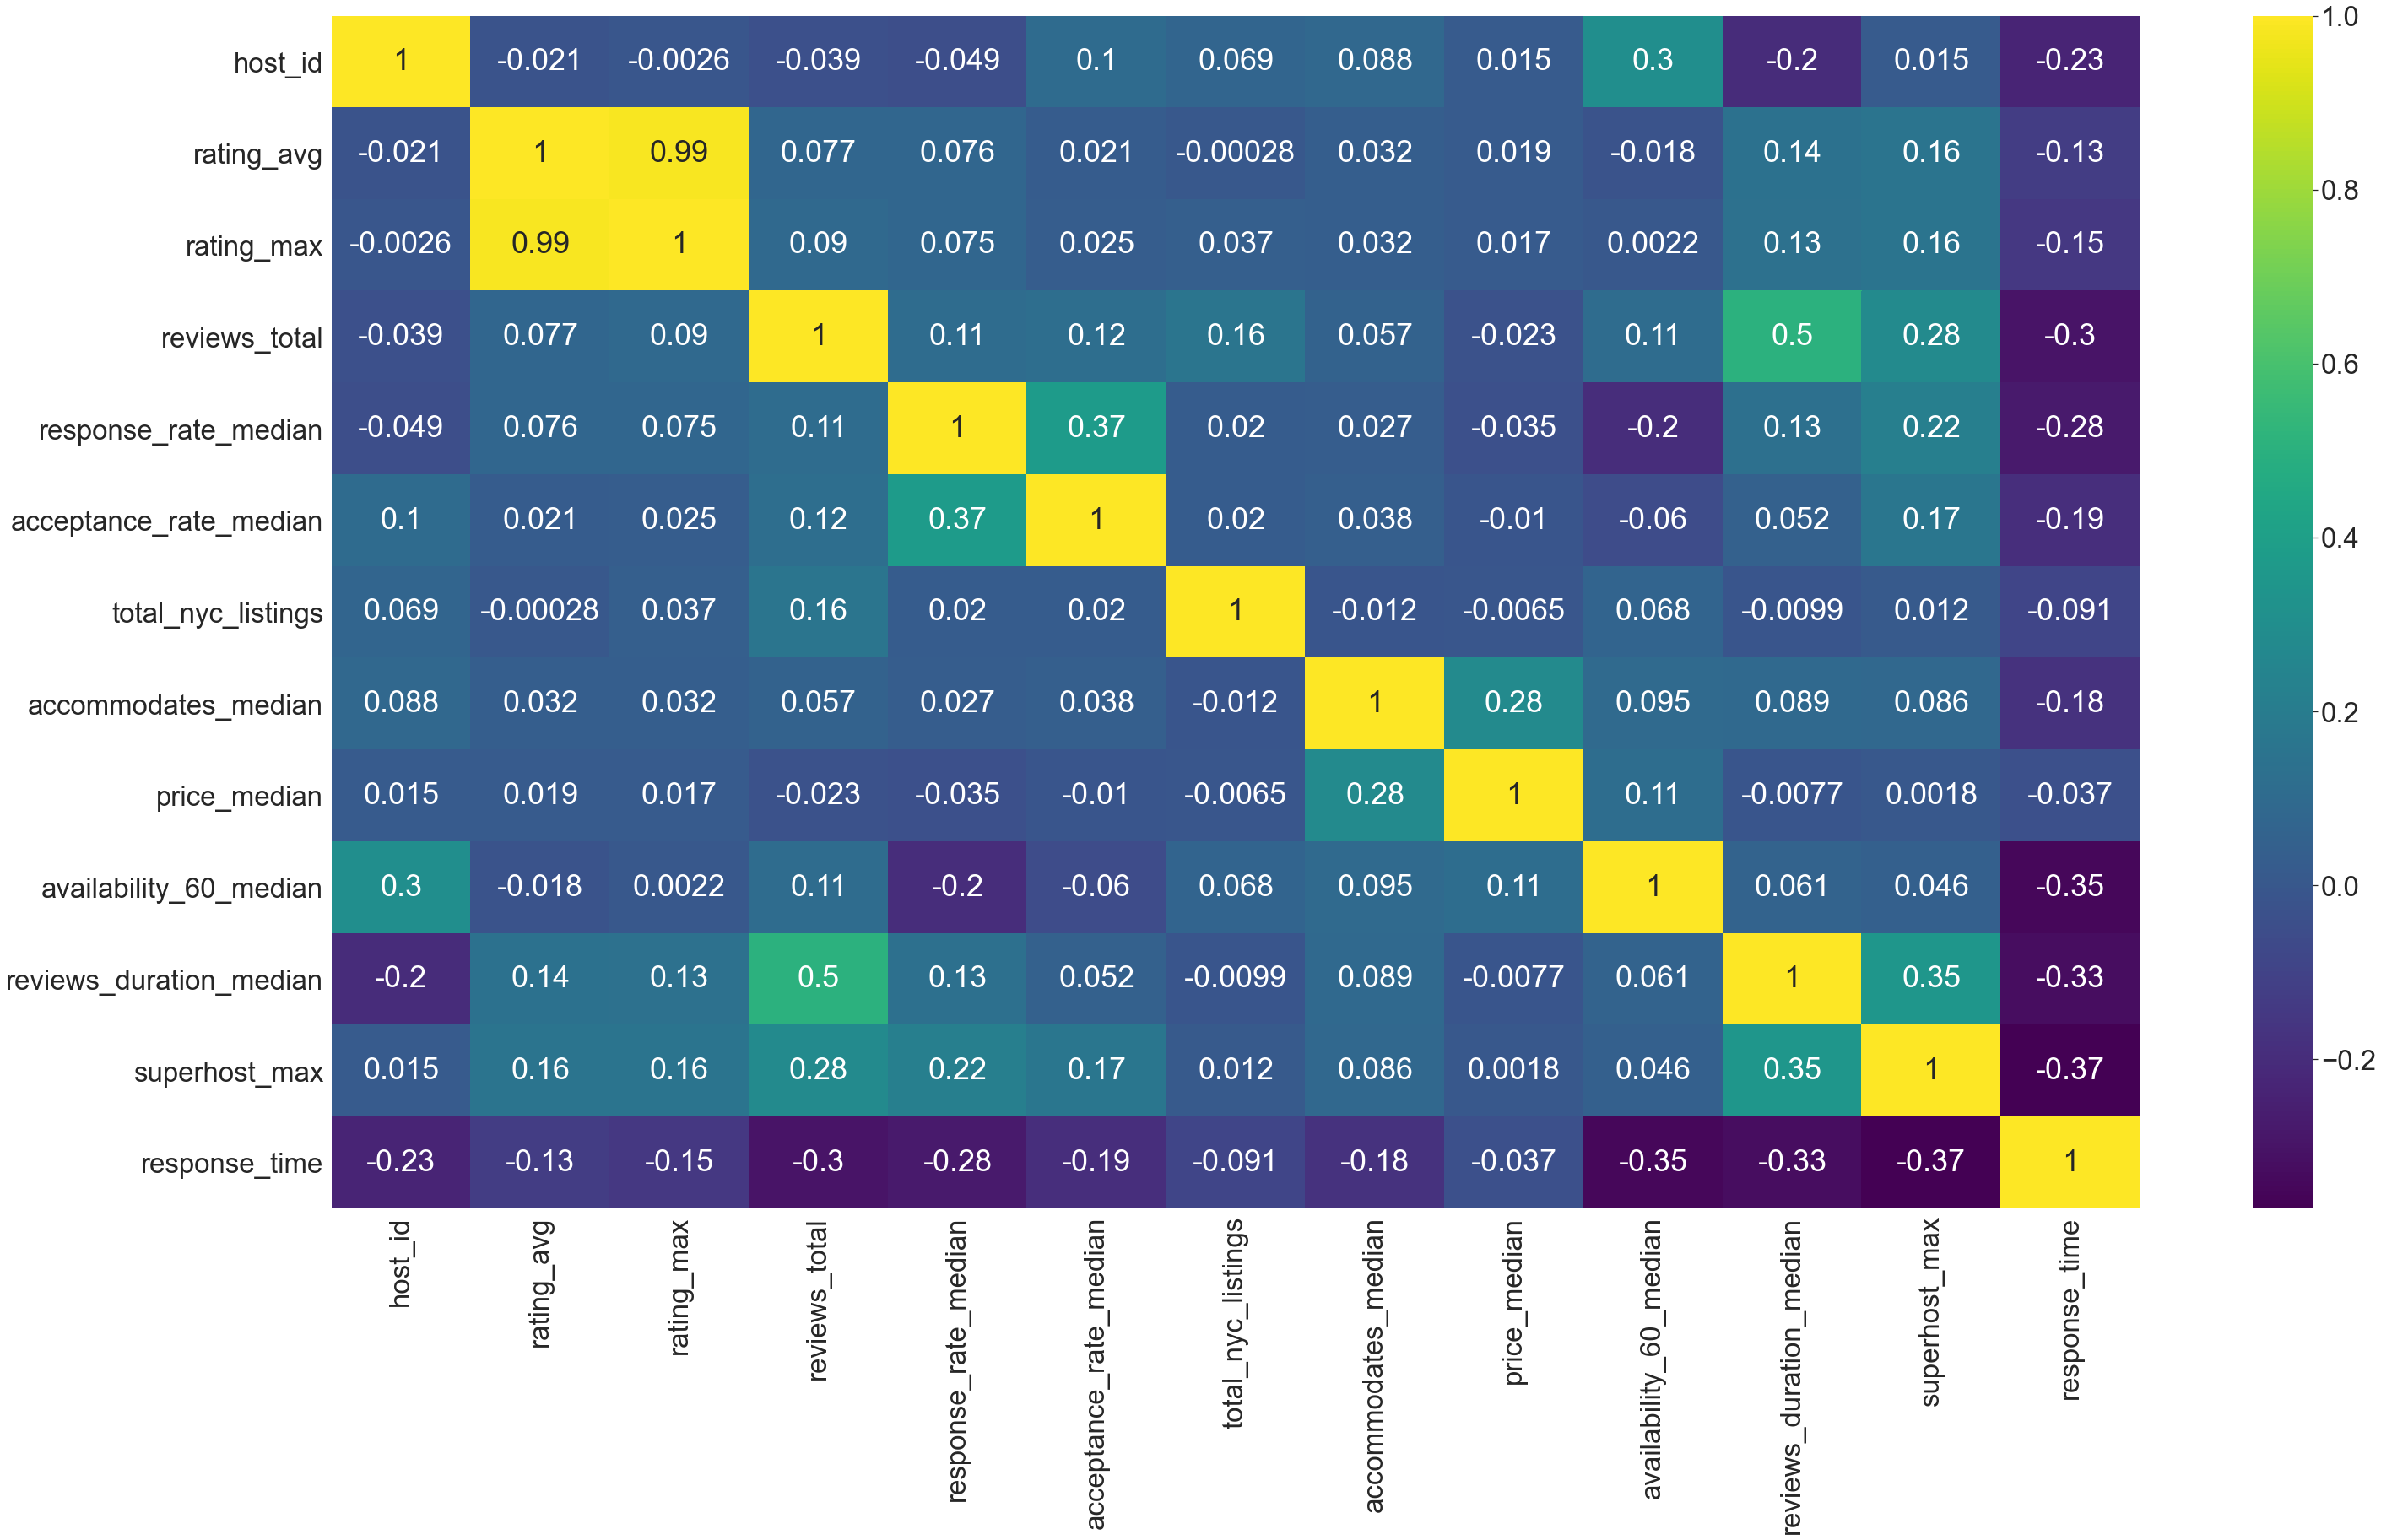

In [252]:
plt.figure(figsize=(48,26))
sns.set(font_scale=3)
sns.heatmap(host_df.corr(),annot=True,cmap='viridis')

**rating_max** and **rating_avg** are very highly correlated. 
>We will drop **rating_max**

In [253]:
host_df.drop('rating_max', axis=1, inplace=True)
host_df.drop('response_time_max', axis=1, inplace=True)


>
> ## Describe The Final Dataset that is used for classification/Regression
>
(include a description of any newly formed variables you created).

> #### [5 points]

In [254]:
host_df.shape

(24397, 12)

### Shape of final dataset
The final dataset that we will model with has 24,397 unqiue observations. with 15 columns that we will describe below. 

### Final Dataset Columns

* host_id - Host ID is a four-digit number that serves as a primary key for a host. Hosts are those who have rights to a certain property through ownership, leases or granted managerial authority. There is no limit to the number of properties they can list on Airbnb. Guests and Hosts have the abilitly to read one another’s profiles. Guests might be influenced by a Hosts reviews or status as a super host. Data type of int64. <br>
<br />
* rating_avg - The average score for all listings grouped by host_id from review_scores_rating. Guests who have stayed at a listing may rate the listing on a scale from 0-5. This score is averaged across all the hosts listings within NYC. 
* reviews_total - The total number of reviews a host has recieved. This number is aggregated across all listings associated with a host_id. <br>
<br />
* response_rate_median - This column takes the median value for a hosts reponse time across all their listings within NYC grouped by host id. The original column is a precentage of how often a host replies to an inquirty sent to them on the Airbnb website. <br>
<br />
* acceptance_rate_median - This column was made from grouping all hosts_acceptance_rate by host id and finidng the median value for each host. The original column, host_accpetance_rate, is continous value from 0-100 and is a percentage of how often a host will accpet a guests request to stay vs reject this request. Hosts can accept or reject a guests request to stay. This could be a factor of scheduling and timing. Or a factor of a guests poor rating. Hosts and guests rate one another after a stay. The cumulative rating servers as a social credit on the website. This can influence a hosts decision to accept a guests request to stay at their place. <br>
<br />
* total_nyc_listings - This column represents the total number of listings a host has available in NYC. By grouping host_calculated_listings by host id. Represented by an integer value. <br>
<br />
* accommodates_median - This column is the median number of a guests a particular host is able to lodge in NYC. values are represented by an integer type. <br>
<br />
* price_median - The is the median price of all the listings in NYC associated with a particular host. Values are represented by an integer type <br>
<br />
* availability_60_median - This is the median number of days a host has made their listings available. Group by host_id the original column is availability_60 The number of nights the listing is available within the next 60 days. The availability could be a factor of bookings. Can also be a factor of the host living in the property, since some properties listed on Airbnb are hosts primary residence.   <br>  
<br />
* reviews_duration_median - <br>

<br />
* <b>superhost_max</b> - Our Target variable. If a host meets requirements for superhost in one of the listings than the host is superhost for all their listings. Boolean value True / False stating whether host meets condition of currently having the the status of “Superhost”. From Airbnb website “Every 3 months, each host is evaluated on their hospitality. Superhosts meet all of the criteria – they’re highly rated, experienced, reliable, and responsive.” They must meet certain criteria of; 4.8+ rating, 10+ stays, 1% cancellation rate, and 90% response rate.  The number one benefit of being a Superhost is that it improves the visibility of your listings. For one, there is a super host only filter. Superhost properties are more likely to be featured in Airbnb newsletters and curated lists on the Airbnb website. Becoming a super host and sporting the superhost badge builds trust and allows guests to stand out from the crowd. Having the superhost badge my allow hosts to increase their rates. From the host tools website, “Guests expect a higher level of service and a better experience from Superhosts, so it’s likely that they’re willing to pay more.” [From Airbnb website: How to become a SuperHost](https://www.airbnb.com/help/article/829/how-do-i-become-a-superhost).<br>
<br />

The following columns are categorical dummy variables columns representing host response time - This column's data type is category that approximates how long it takes for a host to reply to an inquiry. The strings have a ordinal relationship. The fastest to slowest response are denoated as: “within an hour”, “within a few hours”, “within a day”, “a few days or more”. This information is available on the website to prospective guest.
* response_time_max_missing -  This column reflects those hosts who do not have any response time data. Probably emblematic of a new host. <br />
* response_time_max_within a day - Those hosts with the longest response time. A host who will respond within a day <br>
* response_time_max_within a few hours - Host response time generally takes a few hours to respond to inquires <br />
* response_time_max_within an hour -  Those hosts that will respond the fastest, within an hour. <br />

___
# Modeling and Evaluation 
___

#### [70 points total]

> 
> ## Choose and explain your evaluation metrics
> 

i.e., accuracy, precision, recall, F-measure, or any metric we have discussed). Why are the measure(s) appropriate for analyzing the results of your modeling? Give a detailed explanation backing up any assertions.

> #### [10 points]

> 
> ## Choose the method you will use for dividing your data into training and testing splits
> 

i.e., are you using Stratified 10-fold cross validation? Why?). Explain why your chosen method is appropriate or use more than one method as appropriate.

> #### [10 points]

> 
> ## Create three different classification/regression models (e.g., random forest, KNN, and Logistic Regression).
> 

Two modeling techniques must be new (but the third could be SVM or logistic regression). Adjust parameters as appropriate to increase generalization

> #### [20 points]

# Split train and test datasets
- **host_df** is for classification task (Logistic regression included here)
- **listings** is for regression task

We're required to do:
- two classification tasks OR
- two regression tasks OR
- one classification task and one regression task

In [255]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
import time

## **host_df** for classification task

Split the host dataframe to preserve a validation set for comparing models after tuning on CV of initial train/test split. We are using the stratified shuffle split so the validation set is representative of classes, as well as random_state so the if this code is run multiple times we get the same splits for consistentcy

In [256]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=42)
for train_index, test_valid_index in split.split(host_df, host_df.superhost_max):
    host_modeling = host_df.iloc[train_index]
    host_validation = host_df.iloc[test_valid_index]

In [257]:
print("Size of modeling set (to be CV split): ",host_modeling.shape)
print("Size of hold back validation set: ",host_validation.shape)

Size of modeling set (to be CV split):  (21957, 12)
Size of hold back validation set:  (2440, 12)


In [302]:
#Create new X predictor matrix
X_host = host_modeling.drop(['superhost_max','host_id'],axis=1).values #droping rating_max
y_host = host_modeling['superhost_max'].values
y_host = y_host.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host)
X_host = scl_obj.transform(X_host)

In [303]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import StratifiedKFold


num_cv_iterations = 10 #Change to 10 fold for final optimization (longer compute time)
num_instances = len(y_host)
cv_object = StratifiedKFold(n_splits=num_cv_iterations, shuffle=True, random_state=27)


Create predictor variable matrix (X) and target matrix (y) then

Scale predictor variables, so that coefficient weights can be compared for significance after modeling

Load libraries needed for modeling & create a scoring dictionary for metrics used to compare models

In [304]:
scorer = {
    'accuracy': make_scorer(accuracy_score),
    'sensitivity': make_scorer(recall_score),
    'specificity': make_scorer(recall_score,pos_label=0)
}

# Logistic Regression

### Conclusion from MiniLab for the model that we picked

Since our goal was to provide guidance on what the most important factors are to become a superhost, model interpretability is more important than classification. For this reason we chose accuracy as a more important metric than sensitivity or specificity. Using a Logistic Regression with host level data and no class weight gives us the best balance of accuracy (86%), interpretability, and fast run times in the event we add more data or cities in further analysis


In [305]:
#lr does not have weights applied
start_time = time.time()
lr = LogisticRegression(penalty='l2', C=1.0, class_weight=None, solver='liblinear' ) # get object

cv_results = sklearn.model_selection.cross_validate(lr, X_host, y_host, cv=cv_object, scoring=scorer) #lr does not have weights applied
print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())
print("Run Time: ",time.time() - start_time, "seconds")

{'fit_time': array([0.03130388, 0.02469087, 0.02445483, 0.02373719, 0.02357316,
       0.02301884, 0.02284598, 0.02272391, 0.0221839 , 0.02174187]), 'score_time': array([0.00296593, 0.00257707, 0.00180101, 0.0018959 , 0.00172901,
       0.00166512, 0.0016582 , 0.00162983, 0.00160003, 0.00180006]), 'test_accuracy': array([0.86566485, 0.86020036, 0.85336976, 0.85655738, 0.85200364,
       0.86202186, 0.86612022, 0.86788155, 0.86560364, 0.85740319]), 'test_sensitivity': array([0.4       , 0.38933333, 0.37866667, 0.40266667, 0.41333333,
       0.38133333, 0.38666667, 0.424     , 0.424     , 0.39466667]), 'test_specificity': array([0.96155958, 0.95716639, 0.95112576, 0.95002746, 0.94233937,
       0.96101043, 0.96485448, 0.95934066, 0.95659341, 0.95274725])}
Mean Accuracy =  0.8606826451904684
Mean Sensitivity =  0.3994666666666667
Mean Specificity =  0.9556764789301857
Run Time:  0.2698700428009033 seconds


In [262]:
model_summary = pd.DataFrame(columns=['Model Type', 'Dataset', 'Features', 'Class Weight', 'Accuracy', 'Sensitivity', 'Specificity','Run Time'])
model_summary = model_summary.append({'Model Type': 'Logistic', 'Dataset': 'Hosts', 'Features': 'All', 'Class Weight': 'None', 'Accuracy': 86.2,  'Sensitivity': 40.0, 'Specificity': 95.7, 'Run Time': 0.53}, ignore_index=True)
# Run Time = 0.53 based on Puri's laptop

Make predictions on hold back validation set to compare metrics to the CV model

In [263]:
#Create new X predictor matrix
X_host_validate = host_validation.drop(['superhost_max','host_id'],axis=1).values #droping rating_max
y_host_validate = host_validation['superhost_max'].values
y_host_validate = y_host_validate.astype(int)

#Scale new predictor matrix
from sklearn.preprocessing import StandardScaler
scl_obj = StandardScaler()
scl_obj.fit(X_host_validate)
X_host_validate = scl_obj.transform(X_host_validate)

[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.8573770491803279


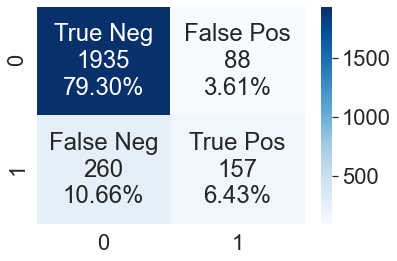

In [364]:
model_fit = lr.fit(X_host,y_host)
validation_predictions = lr.predict(X_host_validate)

print(validation_predictions)
from sklearn.metrics import accuracy_score
print("Validation Set Accuracy: ", accuracy_score(y_host_validate, validation_predictions))

import seaborn as sns

def plot_confusion(cf_matrix):
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')


cm = confusion_matrix(y_host_validate,validation_predictions)
plot_confusion(cm)

In [369]:
weights = model_fit.coef_.T # take transpose to make a column vector
variable_names = host_validation.drop(['superhost_max','host_id'],axis=1).columns 

coefficients = pd.DataFrame(weights,variable_names)
coefficients = coefficients.rename(columns={coefficients.columns[0]: 'weight'})
coefficients = coefficients.sort_values(by='weight', key=abs, ascending=False)
coefficients.reset_index(level=0, inplace=True)
coefficients.head(100)

,index,weight
0,rating_avg,3.326808
1,response_rate_median,0.663777
2,response_time,-0.557693
3,reviews_duration_median,0.475328
4,reviews_total,0.233058
5,acceptance_rate_median,0.202899
6,price_median,-0.111901
7,accommodates_median,0.095208
8,availability_60_median,-0.028672
9,total_nyc_listings,0.004619


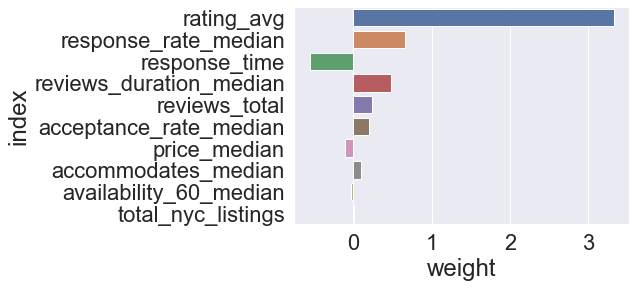

In [370]:
ax = sns.barplot(y="index", x="weight", data=coefficients)


# kNN model

In [265]:
%%time
from sklearn.neighbors import KNeighborsClassifier

yhat = np.zeros(y_host.shape) # we will fill this with predictions

knn = KNeighborsClassifier(n_neighbors=5)

cv_results = sklearn.model_selection.cross_validate(knn, X_host, y_host, cv=cv_object, scoring=scorer) #lr does not have weights applied

print(cv_results)
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())

{'fit_time': array([0.15485477, 0.15001798, 0.15126491, 0.16033721, 0.15056491,
       0.15027404, 0.15108991, 0.14971113, 0.15031075, 0.15261412]), 'score_time': array([0.17088532, 0.16644907, 0.16952705, 0.21470165, 0.16754818,
       0.165833  , 0.16657209, 0.17048597, 0.16248703, 0.16864491]), 'test_accuracy': array([0.84380692, 0.86156648, 0.85291439, 0.84608379, 0.85154827,
       0.84517304, 0.84608379, 0.84783599, 0.86059226, 0.84783599]), 'test_sensitivity': array([0.46133333, 0.50666667, 0.456     , 0.47466667, 0.50933333,
       0.42133333, 0.472     , 0.504     , 0.50133333, 0.45866667]), 'test_specificity': array([0.92257002, 0.93465129, 0.93465129, 0.92257002, 0.92202087,
       0.9324547 , 0.92311917, 0.91868132, 0.93461538, 0.92802198])}
Mean Accuracy =  0.8503440921783654
Mean Sensitivity =  0.47653333333333336
Mean Specificity =  0.9273356023438396
CPU times: user 3.34 s, sys: 646 ms, total: 3.99 s
Wall time: 3.25 s


In [266]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1, 31))

param_grid = dict(n_neighbors=k_range)

grid = GridSearchCV(knn, param_grid, cv=cv_object, scoring='accuracy')
grid.fit(X_host, y_host)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

Best Parameters from search:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 17, 'p': 2, 'weights': 'uniform'}
Best Accuracy:  0.8589521432631706


Text(0, 0.5, 'Cross-Validated Accuracy')

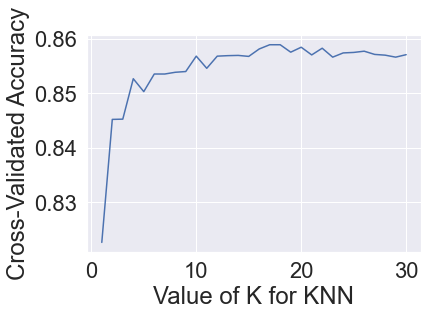

In [267]:
print("Best Parameters from search: ",grid.best_estimator_.get_params())
print("Best Accuracy: ",grid.best_score_)


plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

## Run another grid search with parameters beyond k (with reduced range of k to speed it up now that we know the relationship)

In [268]:
param_grid2 = {
    'n_neighbors': [1,8,16,24],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski'],
}

grid2 = GridSearchCV(knn, param_grid2, cv=cv_object, scoring='accuracy')
grid2.fit(X_host, y_host)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [1, 8, 16, 24],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [269]:
print("Best Parameters from search: ",grid2.best_estimator_.get_params())
print("Best Accuracy: ",grid2.best_score_)


Best Parameters from search:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 24, 'p': 2, 'weights': 'uniform'}
Best Accuracy:  0.8641437527747696


Manhattan distance produced best performance, re-check for optimal k

In [270]:
k_range = list(range(1, 61))


param_grid3 = {
    'n_neighbors': k_range,
    'weights': ['uniform'],
    'metric': ['manhattan']
}

grid3 = GridSearchCV(knn, param_grid3, cv=cv_object, scoring='accuracy')
grid3.fit(X_host, y_host)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform']},
             scoring='accuracy')

Best Parameters from search:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 34, 'p': 2, 'weights': 'uniform'}
Best Accuracy:  0.8644626593806921


Text(0, 0.5, 'Cross-Validated Accuracy')

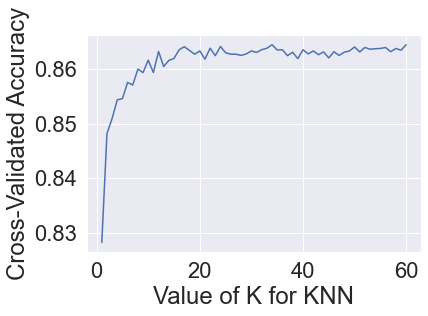

In [271]:
print("Best Parameters from search: ",grid3.best_estimator_.get_params())
print("Best Accuracy: ",grid3.best_score_)


plt.plot(k_range, grid3.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [272]:
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.pipeline import Pipeline

X_smote = X_host
y_smote = y_host
smote = SMOTE(random_state = 11)
X_smote, y_smote = smote.fit_resample(X_smote, y_smote)

In [273]:
k_range = list(range(1, 61))


param_grid4 = {
    'n_neighbors': k_range,
    'weights': ['uniform'],
    'metric': ['manhattan']
}

grid4 = GridSearchCV(knn, param_grid4, cv=cv_object, scoring='accuracy')
grid4.fit(X_smote, y_smote)

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=27, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['manhattan'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...],
                         'weights': ['uniform']},
             scoring='accuracy')

Best Parameters from search:  {'algorithm': 'auto', 'leaf_size': 30, 'metric': 'manhattan', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 1, 'p': 2, 'weights': 'uniform'}
Best Accuracy:  0.9220630831878263


Text(0, 0.5, 'Cross-Validated Accuracy')

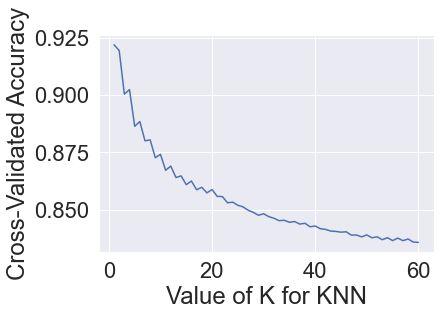

In [274]:
print("Best Parameters from search: ",grid4.best_estimator_.get_params())
print("Best Accuracy: ",grid4.best_score_)


plt.plot(k_range, grid4.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

# Check performance on validation set after tuning hyperparameters

Validation Set Accuracy:  0.8545081967213115


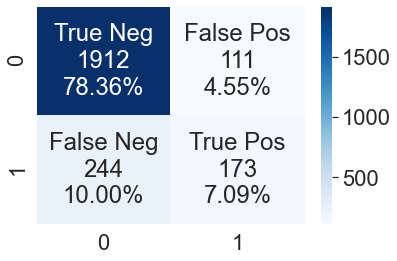

In [360]:
best_knn = KNeighborsClassifier(weights='uniform', metric='manhattan', n_neighbors=40)

model_fit = best_knn.fit(X_host,y_host)
validation_predictions = best_knn.predict(X_host_validate)

from sklearn.metrics import accuracy_score
print("Validation Set Accuracy: ", accuracy_score(y_host_validate, validation_predictions))

from sklearn.metrics import classification_report, confusion_matrix
cm = confusion_matrix(y_host_validate,validation_predictions)

import seaborn as sns

def plot_confusion(cf_matrix):
    sns.set(font_scale=2)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
    cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
    zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plot_confusion(cm)

# Check performance on validation set using smote model

## While smote increased accuracy on training CV, it has poor performance on validation set

[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.7987704918032786


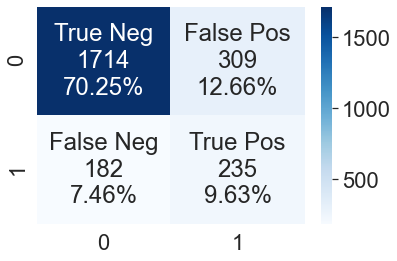

In [276]:
best_knn_smote = KNeighborsClassifier(weights='uniform', metric='manhattan', n_neighbors=1)

model_fit = best_knn_smote.fit(X_smote,y_smote)
validation_predictions = best_knn_smote.predict(X_host_validate)

print(validation_predictions)
from sklearn.metrics import accuracy_score
print("Validation Set Accuracy: ", accuracy_score(y_host_validate, validation_predictions))

cm = confusion_matrix(y_host_validate,validation_predictions)
plot_confusion(cm)


In [277]:
#

prediction_df = pd.DataFrame(validation_predictions)
prediction_df = prediction_df.rename(columns={prediction_df.columns[0]: 'Prediction'})

prediction_df.reset_index(drop=True, inplace=True)
host_validation.reset_index(drop=True, inplace=True)


results = pd.concat([host_validation, prediction_df], axis=1)

results['classification_group'] = np.where((results['superhost_max'] == False) & (results['Prediction']==0), 'True Negative',
np.where((results['superhost_max'] == False) & (results['Prediction']==1), 'False Positive', 
np.where((results['superhost_max'] == True) & (results['Prediction']==0), 'False Negative', 
np.where((results['superhost_max'] == True) & (results['Prediction']==1), 'True Positive', '?'))))

#results.head(50)

print(results.groupby('classification_group').size())


classification_group
False Negative     182
False Positive     309
True Negative     1714
True Positive      235
dtype: int64


In [278]:
results[results.classification_group == "False Negative"].head(10)

,host_id,rating_avg,reviews_total,response_rate_median,acceptance_rate_median,total_nyc_listings,accommodates_median,price_median,availability_60_median,reviews_duration_median,superhost_max,response_time,Prediction,classification_group
1,9840180,4.574993,0,100.000000,100.000000,1.0,7.0,300.0,27.0,0.0,True,1,0,False Negative
39,16404967,4.760000,21,100.000000,6.000000,1.0,3.0,85.0,3.0,587.0,True,2,0,False Negative
55,256462453,4.767497,25,67.000000,40.000000,2.0,3.0,225.0,2.5,72.5,True,2,0,False Negative
69,805344,4.574993,0,86.330958,75.619603,1.0,2.0,129.0,0.0,0.0,True,4,0,False Negative
72,76451668,4.820000,22,90.000000,38.000000,1.0,2.0,110.0,6.0,523.0,True,2,0,False Negative
74,269816077,5.000000,16,86.330958,75.619603,1.0,2.0,148.0,0.0,112.0,True,4,0,False Negative
89,107294313,4.920000,145,86.330958,75.619603,1.0,5.0,206.0,52.0,1377.0,True,4,0,False Negative
90,2851409,5.000000,2,86.330958,75.619603,1.0,4.0,150.0,0.0,40.0,True,4,0,False Negative
97,5699385,4.830000,30,86.330958,75.619603,1.0,3.0,140.0,0.0,184.0,True,4,0,False Negative
119,20321004,5.000000,5,86.330958,75.619603,1.0,2.0,100.0,0.0,85.0,True,4,0,False Negative


(4.0, 5.1)

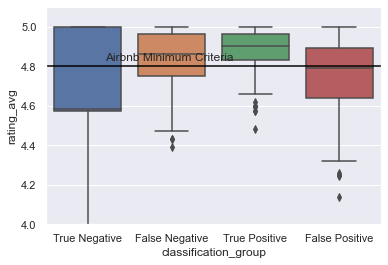

In [279]:
sns.set(font_scale=1)
ax = sns.boxplot(x="classification_group", y="rating_avg", data=results)
plt.axhline(y=4.8, color='black')
plt.text(0.2,4.83,'Airbnb Minimum Criteria',rotation=0)
ax.set_ylim(4,5.1)

(0.0, 250.0)

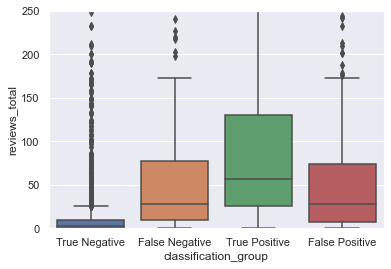

In [280]:
ax = sns.boxplot(x="classification_group", y="reviews_total", data=results)
ax.set_ylim(0,250)

(0.0, 100.0)

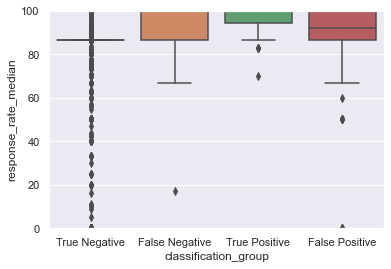

In [281]:
ax = sns.boxplot(x="classification_group", y="response_rate_median", data=results)
ax.set_ylim(0,100)

(0.0, 100.0)

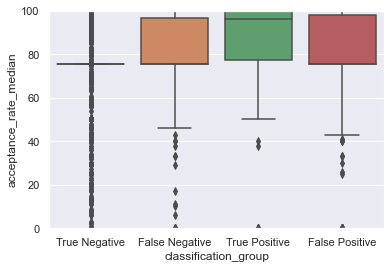

In [282]:
ax = sns.boxplot(x="classification_group", y="acceptance_rate_median", data=results)
ax.set_ylim(0,100)

(0.0, 20.0)

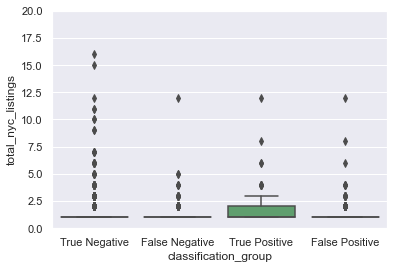

In [283]:
ax = sns.boxplot(x="classification_group", y="total_nyc_listings", data=results)
ax.set_ylim(0,20)

(0.0, 500.0)

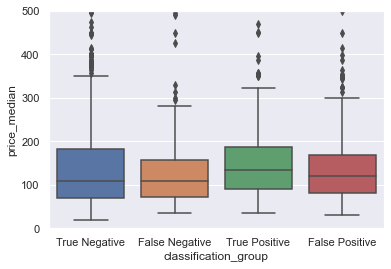

In [284]:
ax = sns.boxplot(x="classification_group", y="price_median", data=results)
ax.set_ylim(0,500)

(0.0, 60.0)

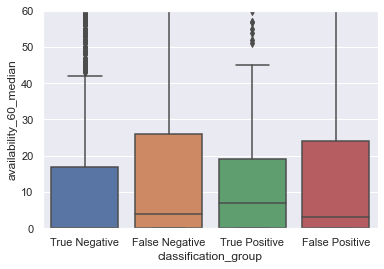

In [285]:
ax = sns.boxplot(x="classification_group", y="availability_60_median", data=results)
ax.set_ylim(0,60)

(0.0, 3.1)

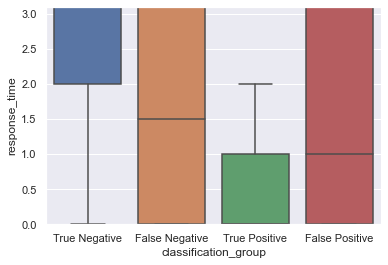

In [286]:
ax = sns.boxplot(x="classification_group", y="response_time", data=results)
ax.set_ylim(0,3.1)

# Random Forest with grid search

In [335]:
rf = RandomForestClassifier()

cv_results = sklearn.model_selection.cross_validate(rf, X_host, y_host, cv=cv_object, scoring=scorer, return_estimator=True) 
print("Mean Accuracy = ",cv_results['test_accuracy'].mean())
print("Mean Sensitivity = ",cv_results['test_sensitivity'].mean())
print("Mean Specificity = ",cv_results['test_specificity'].mean())

Mean Accuracy =  0.8823615727082996
Mean Sensitivity =  0.5456000000000001
Mean Specificity =  0.951722335873901


In [337]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}


# Base RF model using 10-fold stratified cv
# Accuracy = 88.2%
max_depth: None
n_estimators: 100
min_samples_split: 2
min_samples_leaf: 1

In [323]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 8, 15, 25, 30, 'None'],
    'n_estimators': [50, 150, 300, 500, 800],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10] 
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_object, scoring='accuracy')

In [ ]:
# Fit the grid search to the data
grid_search.fit(X_host, y_host)
grid_search.best_params_

In [322]:
print("Best Accuracy: ",grid_search.best_score_)


Best Accuracy:  0.8843200310359277


In [330]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import RandomizedSearchCV


# Random search of parameters search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 20, cv = cv_object, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_host, y_host)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=27, shuffle=True),
                   estimator=RandomForestClassifier(), n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 15, 25, 30],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [50, 150, 300, 500,
                                                         800]},
                   random_state=42, scoring='accuracy', verbose=2)

In [331]:
print("Best Accuracy: ",rf_random.best_score_)
print("Best Accuracy: ",rf_random.best_params_)


Best Accuracy:  0.8870979332893519
Best Accuracy:  {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 25}


Run 1 (10 iterations)
Best Accuracy:  0.8870068793540543
Best Accuracy:  {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 25}

Run 2 (20 iterations)
Best Accuracy:  0.8870979332893519
Best Accuracy:  {'n_estimators': 800, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 25}

split and depth are in middle of grid range, n_estimators and min leaf are at top edge of grid, expand those in new grid in code chunk below

Run 3 (expanded grid range)
# Best Accuracy:  0.8871433046624428
# Best Accuracy:  {'n_estimators': 800, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_depth': 25}

Run 4 (expanded grid range same as 3, just checking repeatability)
Best Accuracy:  0.8870066718946438
Best Accuracy:  {'n_estimators': 1200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 8}

Run 5 (added 'None' to grid range for max_depth)
Best Accuracy:  0.8869613627593761
Best Accuracy:  {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 30}


In [338]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [5, 8, 15, 25, 30, 'None'],
    'n_estimators': [50, 150, 300, 500, 800, 1200],
    'min_samples_split': [2, 5, 10, 15, 100],
    'min_samples_leaf': [1, 2, 5, 10, 15] 
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = cv_object, scoring='accuracy')


# Random search of parameters search across 100 different combinations, and use all available scores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = param_grid, n_iter = 20, cv = cv_object, verbose=2, random_state=42, n_jobs = -1, scoring='accuracy')
# Fit the random search model
rf_random.fit(X_host, y_host)

print("Best Accuracy: ",rf_random.best_score_)
print("Best Accuracy: ",rf_random.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


/opt/anaconda3/lib/python3.8/site-packages/joblib/externals/loky/process_executor.py:688: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.8814046         nan 0.88600466 0.88627807 0.8810402  0.88650572
 0.88568582 0.88158673 0.88126812 0.88145031 0.88126803 0.88664256
        nan 0.88031152 0.88696136 0.88664227 0.88559499 0.88627797
 0.88650564 0.88040274]
  warnings.warn(


Best Accuracy:  0.8869613627593761
Best Accuracy:  {'n_estimators': 500, 'min_samples_split': 15, 'min_samples_leaf': 10, 'max_depth': 30}


# Check best RF model on validation set

[0 0 0 ... 0 0 0]
Validation Set Accuracy:  0.8868852459016393
Validation Set Precision:  0.7252396166134185
Validation Set Recall:  0.5443645083932853


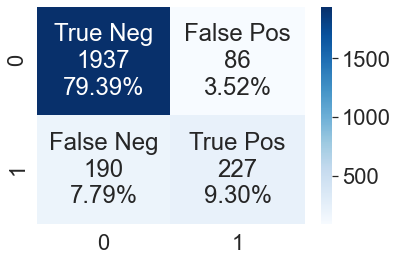

In [375]:
# Best Accuracy:  {'n_estimators': 800, 'min_samples_split': 100, 'min_samples_leaf': 5, 'max_depth': 25}

rf = RandomForestClassifier(max_depth=25, n_estimators=800, min_samples_split=100, min_samples_leaf=5)

training_model = rf.fit(X_host,y_host)
validation_predictions = training_model.predict(X_host_validate)

print(validation_predictions)
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


print("Validation Set Accuracy: ", accuracy_score(y_host_validate, validation_predictions))
print("Validation Set Precision: ", precision_score(y_host_validate, validation_predictions))
print("Validation Set Recall: ", recall_score(y_host_validate, validation_predictions))


cm = confusion_matrix(y_host_validate,validation_predictions)
plot_confusion(cm)


In [354]:
print(training_model.feature_importances_)


print(host_modeling.drop(['superhost_max','host_id'],axis=1).columns) #droping rating_max

variable_names = host_modeling.drop(['superhost_max','host_id'],axis=1).columns

FeatureImportance = pd.DataFrame(training_model.feature_importances_,variable_names)
FeatureImportance = FeatureImportance.rename(columns={FeatureImportance.columns[0]: 'weight'})
FeatureImportance = FeatureImportance.sort_values(by='weight', key=abs, ascending=False)
FeatureImportance.reset_index(level=0, inplace=True)
FeatureImportance.head(100)


[0.25564387 0.27457306 0.13947333 0.0750313  0.00831835 0.00879865
 0.02273763 0.02481917 0.11441712 0.0761875 ]
Index(['rating_avg', 'reviews_total', 'response_rate_median',
       'acceptance_rate_median', 'total_nyc_listings', 'accommodates_median',
       'price_median', 'availability_60_median', 'reviews_duration_median',
       'response_time'],
      dtype='object')


,index,weight
0,reviews_total,0.274573
1,rating_avg,0.255644
2,response_rate_median,0.139473
3,reviews_duration_median,0.114417
4,response_time,0.076188
5,acceptance_rate_median,0.075031
6,availability_60_median,0.024819
7,price_median,0.022738
8,accommodates_median,0.008799
9,total_nyc_listings,0.008318


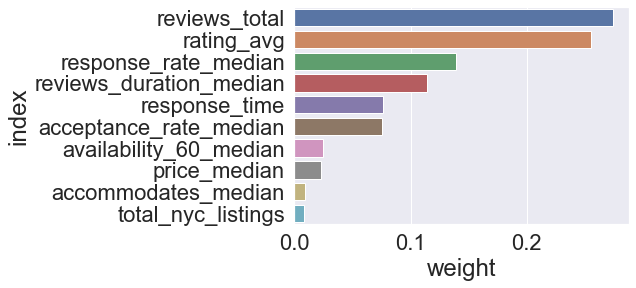

In [372]:
plot = sns.barplot(y="index", x="weight", data=FeatureImportance)


<AxesSubplot:xlabel='weight', ylabel='index'>

## **listings** for classification task

In [287]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34460 entries, 0 to 36723
Data columns (total 60 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              34460 non-null  int64         
 1   last_scraped                    34460 non-null  datetime64[ns]
 2   name                            34460 non-null  object        
 3   description                     34460 non-null  object        
 4   neighborhood_overview           34460 non-null  object        
 5   host_id                         34460 non-null  int64         
 6   host_name                       34460 non-null  object        
 7   host_since                      34460 non-null  datetime64[ns]
 8   host_location                   34460 non-null  object        
 9   host_about                      34460 non-null  object        
 10  host_response_time              34460 non-null  object        
 11  ho

In [288]:
listings['host_lifetime'] = listings.last_scraped - listings.host_since
listings['host_lifetime'] = listings['host_lifetime'].dt.days.astype('int16')

In [289]:
#mapping boolean value to 1 0 for correlation plot
# remember to drop superhost as well as host_is_superhost for modeling

listings['superhost'] = listings['host_is_superhost'].map({True:1,False:0})

In [290]:
drop_variables = ['superhost','last_scraped', 'name', 'description', 'neighborhood_overview', 'id', 'host_id', 'host_name', 'host_since',
                  'host_location', 'host_about', 'host_verifications', 'neighbourhood', 'amenities',
                  'number_of_reviews_l30d', 'first_review', 'last_review', 'reviews_duration', 'number_of_reviews_ltm', 
                  'number_of_reviews_l30d', 'reviews_per_month', 'review_scores_value', 
                  'review_scores_accuracy', 'review_scores_communication', 'review_scores_checkin', 
                  'review_scores_location' , 'longitude', 'accommodates', 'availability_90', 'bedrooms', 'availability_60',
                  'availability_30', 'price', 'host_listings_count', 'latitude']


listings_subset = listings.drop(drop_variables, axis=1)

print(listings_subset.shape)
print(listings_subset.columns)

(34460, 28)
Index(['host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type', 'beds',
       'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'review_scores_rating',
       'review_scores_cleanliness', 'calculated_host_listings_count',
       'host_is_superhost', 'host_has_profile_pic', 'host_identity_verified',
       'has_availability', 'instant_bookable', 'num_baths', 'bath_type',
       'price_per_bed', 'price_per_accomodation', 'room_privacy',
       'domicile_type', 'host_lifetime'],
      dtype='object')


In [291]:
listings[['name','description','neighborhood_overview','host_name','host_location','host_about','host_response_time','host_neighbourhood',
        'host_verifications','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','property_type','room_type','amenities',
        'first_review','last_review','bath_type','price_per_bed','room_privacy','domicile_type']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
price_per_bed,34460.0,110.093714,214.614638,3.125,50.0,79.0,125.0,10000.0


In [292]:
listings_subset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34460 entries, 0 to 36723
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   host_response_time              34460 non-null  object  
 1   host_response_rate              34460 non-null  float64 
 2   host_acceptance_rate            34460 non-null  float64 
 3   host_neighbourhood              34460 non-null  object  
 4   neighbourhood_cleansed          34460 non-null  category
 5   neighbourhood_group_cleansed    34460 non-null  category
 6   property_type                   34460 non-null  object  
 7   room_type                       34460 non-null  category
 8   beds                            34460 non-null  Int16   
 9   minimum_nights                  34460 non-null  Int16   
 10  maximum_nights                  34460 non-null  int64   
 11  availability_365                34460 non-null  Int16   
 12  number_of_reviews 

In [293]:
listings_subset[['Sex','Embarked']].describe().transpose()

KeyError: "None of [Index(['Sex', 'Embarked'], dtype='object')] are in the [columns]"

In [ ]:
#Create new X predictor matrix
X_listings = listings_subset.drop(['price'],axis=1).values #droping rating_max
y_listings = listings_subset['price'].values

#Scale new predictor matrix
#scl_obj.fit(X_listings)
#X_listings = scl_obj.transform(X_listings)

# kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
# k = 5 for KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Use cross_val_score function
# We are passing the entirety of X and y, not X_train or y_train, it takes care of splitting the dat
# cv=10 for 10 folds
# scoring='accuracy' for evaluation metric - althought they are many
scores = cross_val_score(knn, X_listings, y_listings, cv=cv_object , scoring='accuracy')
print(scores)

/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/puri/opt/anaconda3

[nan nan nan nan nan nan nan nan nan nan]


/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/neighbors/_classification.py", line 179, in fit
    return self._fit(X, y)
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/neighbors/_base.py", line 363, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr",
  File "/Users/puri/opt/anaconda3/envs/ML7331/lib/python3.8/site-packages/sklearn/base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "/Users/puri/opt/anaconda3

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

>
> ## Analyze the results using your chosen method of evaluation.
> 

Use visualizations of the results to bolster the analysis. Explain any visuals and analyze why they are interesting to someone that might use this model.

#### [10 points]

>
> ## Discuss the advantages of each model for each classification task
> 

(if any) If there are not advantages, explain why. Is any model better than another? Is the difference significant with 95% confidence? Use proper statistical comparison methods.

> #### [10 points]

>
> ## Which attributes from your analysis are most important?
> 

Use proper methods discussed in class to evaluate the importance of different attributes. Discuss the results and hypothesize about why certain attributes are more important than others for a given classification task.

> #### [10 points]

___
# Deployment 

How useful is your model for interested parties (i.e., the companies or organizations that might want to use it for prediction)? How would you measure the model's value if it was used by these parties? How would your deploy your model for interested parties? What other data should be collected? How often would the model need to be updated, etc.?
___
#### [5 points total]

___
# Exceptional Work 

You have free reign to provide additional modeling. One idea: grid search parameters in a parallelized fashion and visualize the performances across attributes. Which parameters are most significant for making a good model for each classification algorithm?
___
#### [10 points total]